<a href="https://colab.research.google.com/github/pyndasaivamsi/DA623_1D_Convolution_demystified/blob/main/DA623_Assignment_200102071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <ins> **1-D Convolution demystified: Illustration on synthetic and practical signals** </ins>

This notebook is to explain about Convolution which is considered to be one of the fundamental operations of signal processing and machine learning. Various applications like image processing, natural language processing, time series analysis and fourier analysis uses Convolution.

## <ins> Concept: </ins>
The mathematical operation in which a small window of coefficients slides other signal and performs a mathematical operation at each position is said to be Convolution. It is equivalent to applying a kernel or filter to a signal in the context of signal processing.

### <ins> For 1-D Signals:</ins>
In the case of a one dimensional signal, convolution is done by a sliding an array of numbers over the signal and performing element wise multiplication at each position followed by summing the products to get final single value at that position.

Convolution of two signals $x[n]$ and $h[n]$ is obtained by:

$ y[n] = ∑_{k=0}^{N-1} x[n-k] * h[k] $

where,

$y[n]$ is the output at $n^{th}$ index of signal,

$k$ is the index within kernel,

$x[k]$ is the input signal,

$h[k]$ is the kernel,

$N$ is the length of kernel.

## <ins> **Implementation:**</ins>

In signal processing, Synthetic signals are:
1. Sinusoidal signals
2. White Noise
3. Impulse signals
4. Step signals

whereas Practical signals are:

1. Electrocardiogram(ECG)
2. Electroencephalogram(EEG)
3. Electromyogram(EMG)
4. Audio signals
5. Image signals

The above are just a few examples of synthetic and practical signals.

Let's implement convolution in Python.

## <ins> 1-D Signals </ins>

In [ ]:
# Convolution of two 1-D signals

# Convolution operation
def convolution_1d(signal, kernel):
    signal_length = len(signal)
    kernel_length = len(kernel)
    output_length = signal_length + kernel_length - 1
    output = [0] * output_length

    for i in range(output_length):
      for j in range(kernel_length):
        if(i>=j and i-j>=0 and i-j<signal_length):
          output[i] += signal[i-j] * kernel[j]

    return output

# 1-D Signals
signal = [1, 2, 3, 4, 5]
kernel = [0.5, 1, 0.5]

convolved_signal = convolution_1d(signal, kernel)
print(convolved_signal)


[0.5, 2.0, 4.0, 6.0, 8.0, 7.0, 2.5]


This is how the convolution operation works. Let's implement this on some synthetic and practical signals.

## <ins> Sinusoidal signals </ins>



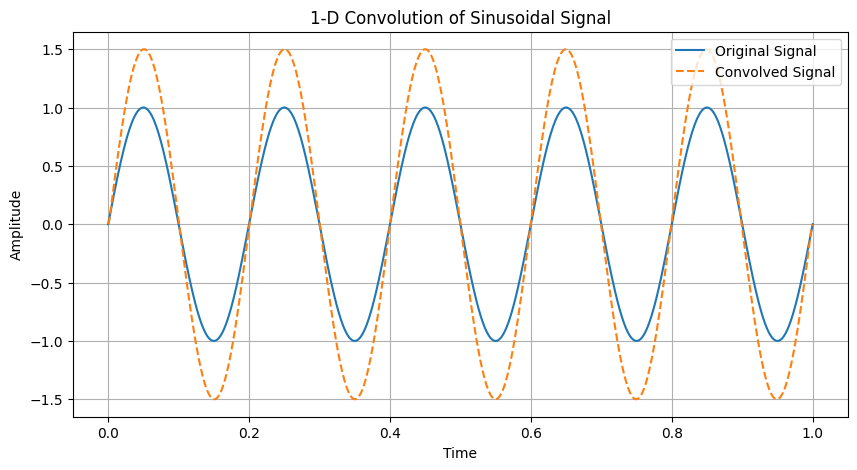

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def convolution_1d(signal, kernel):
    signal_length = len(signal)
    kernel_length = len(kernel)
    output_length = signal_length + kernel_length - 1
    output = np.zeros(output_length)

    for i in range(output_length):
      for j in range(kernel_length):
        if(i>=j and i-j>=0 and i-j<signal_length):
          output[i] += signal[i-j] * kernel[j]

    return output

# Generate a sinusoidal signal
t = np.linspace(0, 1, 1000)  # Time vector from 0 to 1 with 1000 points
frequency = 5  # Frequency of the sinusoidal signal
amplitude = 1  # Amplitude of the sinusoidal signal
sinusoidal_signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Define a smoothing kernel
kernel = np.array([0.5, 0.5, 0.5])  # Smoothing kernel coefficients

# Perform convolution
convolved_signal = convolution_1d(sinusoidal_signal, kernel)

t_out=np.linspace(0, 1, len(convolved_signal))
# Plot the original and convolved signals
plt.figure(figsize=(10, 5))
plt.plot(t, sinusoidal_signal, label='Original Signal')
plt.plot(t_out, convolved_signal, label='Convolved Signal', linestyle='--')
plt.title('1-D Convolution of Sinusoidal Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

The signals used are sinusoidal and an array of all equal values. As the kernel slides over the signal, each position will get same amount of gain for kernel_length times. So, the convolved signal is a scaled version of the input.

## <ins> White Noise </ins>


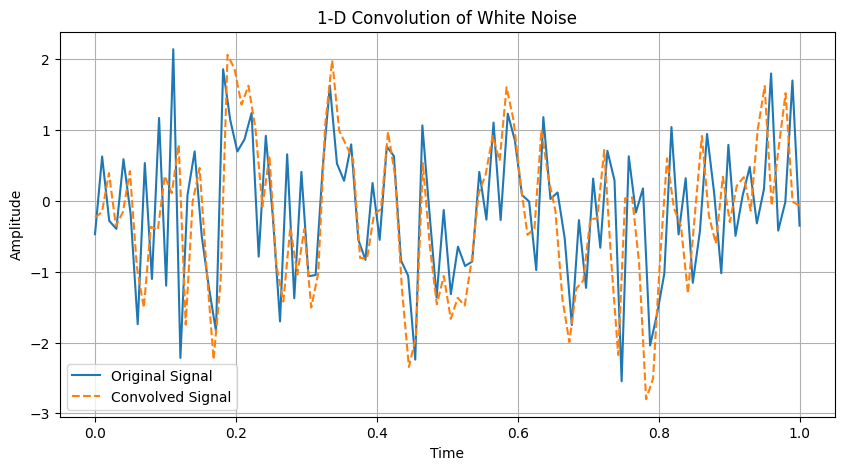

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def convolution_1d(signal, kernel):
    signal_length = len(signal)
    kernel_length = len(kernel)
    output_length = signal_length + kernel_length - 1
    output = np.zeros(output_length)

    for i in range(output_length):
      for j in range(kernel_length):
        if(i>=j and i-j>=0 and i-j<signal_length):
          output[i] += signal[i-j] * kernel[j]

    return output

# Generate a white noise signal
signal_length=100
white_noise= np.random.randn(signal_length)
t = np.linspace(0, 1, signal_length)  # Time vector from 0 to 1 with 100 points

# Define a smoothing kernel
kernel = np.array([0.5, 1, 0.2])  # Smoothing kernel coefficients

# Perform convolution
convolved_signal = convolution_1d(white_noise, kernel)

t_out=np.linspace(0, 1, len(convolved_signal))
# Plot the original and convolved signals
plt.figure(figsize=(10, 5))
plt.plot(t, white_noise, label='Original Signal')
plt.plot(t_out, convolved_signal, label='Convolved Signal', linestyle='--')
plt.title('1-D Convolution of White Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

As the array slides over the input noise signal, it is giving more weight to the previous value according to the array values. So, we can see the signal is similar to right shifted version of input.

## <ins> Impulse signals </ins>


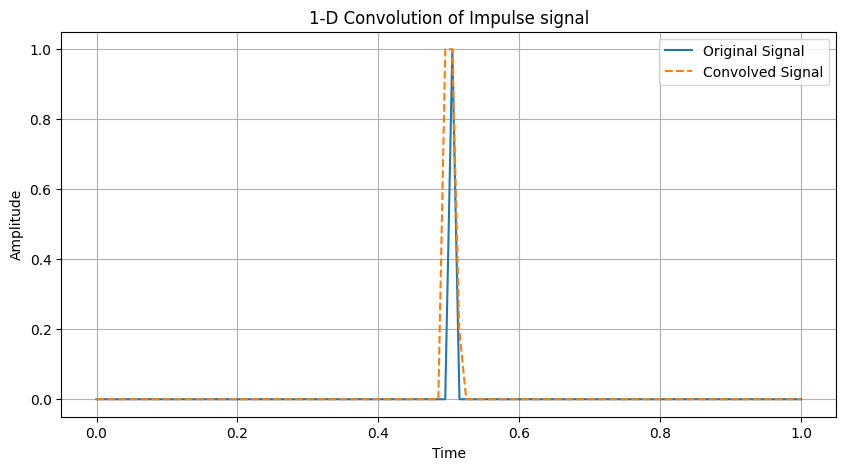

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def convolution_1d(signal, kernel):
    signal_length = len(signal)
    kernel_length = len(kernel)
    output_length = signal_length + kernel_length - 1
    output = np.zeros(output_length)

    for i in range(output_length):
      for j in range(kernel_length):
        if(i>=j and i-j>=0 and i-j<signal_length):
          output[i] += signal[i-j] * kernel[j]

    return output

# Generate an impulse signal
signal_length=100
impulse_signal = np.zeros(signal_length)
impulse_signal[50] = 1  # Impulse at index 10
t = np.linspace(0, 1, signal_length)  # Time vector from 0 to 1 with 100 points

# Define a smoothing kernel
kernel = np.array([1, 1, 0.2])  # Smoothing kernel coefficients

# Perform convolution
convolved_signal = convolution_1d(impulse_signal, kernel)

t_out=np.linspace(0, 1, len(convolved_signal))
# Plot the original and convolved signals
plt.figure(figsize=(10, 5))
plt.plot(t, impulse_signal, label='Original Signal')
plt.plot(t_out, convolved_signal, label='Convolved Signal', linestyle='--')
plt.title('1-D Convolution of Impulse signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

As the array has higher weights in first two indices, a pulse is obtained in output in place of a peak in input signal.

## <ins> Step Signals: </ins>

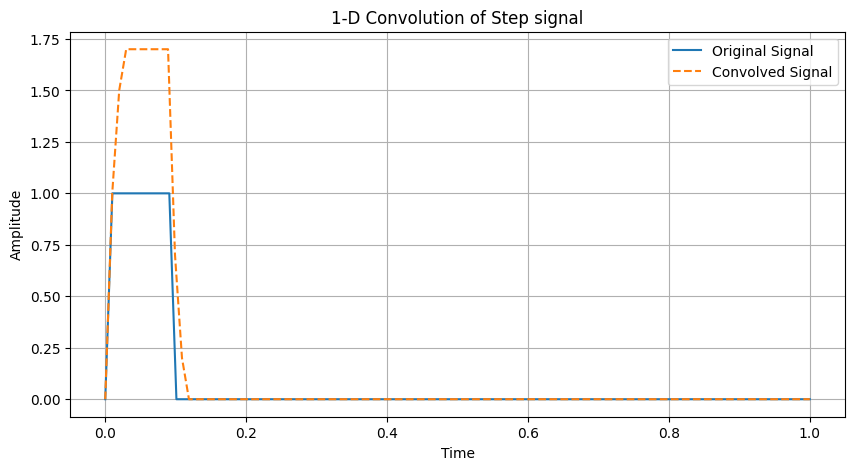

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def convolution_1d(signal, kernel):
    signal_length = len(signal)
    kernel_length = len(kernel)
    output_length = signal_length + kernel_length - 1
    output = np.zeros(output_length)

    for i in range(output_length):
      for j in range(kernel_length):
        if(i>=j and i-j>=0 and i-j<signal_length):
          output[i] += signal[i-j] * kernel[j]

    return output

# Generate a step signal
signal_length=100
step_signal = np.ones(signal_length)  # Step signal with length 100
step_signal[0]=0
step_signal[10:]=0
t = np.linspace(0, 1, signal_length)  # Time vector from 0 to 1 with 100 points

# Define a smoothing kernel
kernel = np.array([1, 0.5, 0.2])  # Smoothing kernel coefficients

# Perform convolution
convolved_signal = convolution_1d(step_signal, kernel)

t_out=np.linspace(0, 1, len(convolved_signal))
# Plot the original and convolved signals
plt.figure(figsize=(10, 5))
plt.plot(t, step_signal, label='Original Signal')
plt.plot(t_out, convolved_signal, label='Convolved Signal', linestyle='--')
plt.title('1-D Convolution of Step signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

As the input is a step signal, the maximum obtained in output signal is sum of all values in array.
This is about the convolution of synthetic signals. This can also be done with signals like chirp, sinc etc.

Let's try this on practical signals.

## <ins> Practical Signals </ins>
In general to work on practical signals, we need to input a data set and then apply convolution operation. Here, let's create a random signal which could help us implement the process.

### Code:

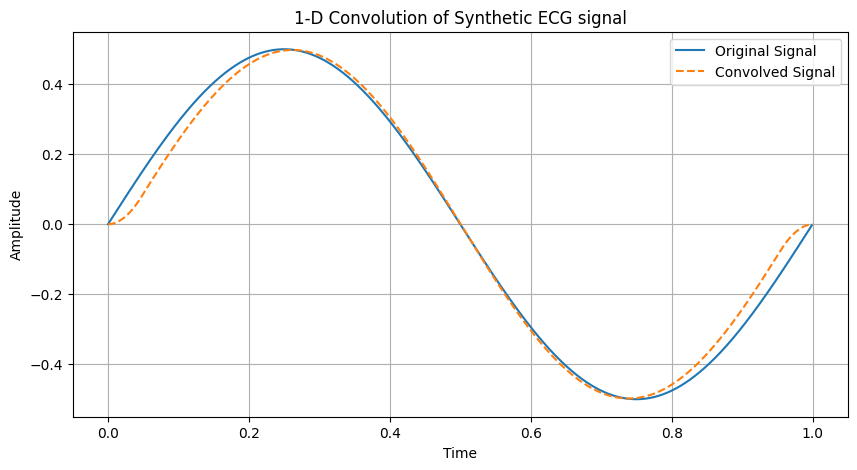

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function for 1D convolution
def convolution_1d(signal, kernel):
    signal_length = len(signal)
    kernel_length = len(kernel)
    output_length = signal_length + kernel_length - 1
    output = np.zeros(output_length)

    for i in range(output_length):
      for j in range(kernel_length):
        if(i>=j and i-j>=0 and i-j<signal_length):
          output[i] += signal[i-j] * kernel[j]

    return output

# In a real scenario, ECG signal data is used in place of synthetic ECG signal
fs = 1000
t = np.arange(0, 1, 1/fs)
f_ecg = 1
ecg_signal = 0.5 * np.sin(2 * np.pi * f_ecg * t)  # Synthetic ECG signal

# A smoothing kernel
kernel = np.ones(50) / 50

# Perform convolution
convolved_signal = convolution_1d(ecg_signal, kernel)

t_out=np.linspace(0, 1, len(convolved_signal))
# Plot the original and convolved signals
plt.figure(figsize=(10, 5))
plt.plot(t, ecg_signal, label='Original Signal')
plt.plot(t_out, convolved_signal, label='Convolved Signal', linestyle='--')
plt.title('1-D Convolution of Synthetic ECG signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


This is convolution of a synthetic ECG signal and a smoothing kernel.

In ***smoothing***, the data points of a signal are modified so individual points higher than the adjacent points (presumably because of noise) are reduced, and points that are lower than the adjacent points are increased leading to a smoother signal. We can observe the change at the ends of the output wave.

This is about the 1-D convolution of synthetic and practical signals.

# <ins> Applications </ins>
There are several applications of 1-D convolution in daily life.

1.  **Signal Processing**
*   *Smoothing and filtering* : Useful for removing noise and for applying filters like low pass, high pass etc.

*   *Edge detection* : Convolutional filters can detect the abrupt changes in amplitude which is highly useful in edge detection. This is also useful in Image processing for edge detection.


2. **Image Processing**
*  *Blurring and Sharpening* : Convolution is used for blurring (e.g., Gaussian blur) and sharpening (e.g., Laplacian) images.

3. **Audio Processing**
*   *Filtering and Equalization*
*   *Echo and Reverb Effects*

4. **Speech Processing**
* *Speech Recognition*
* *Speaker Verifications* : CNNs are used for this verification tasks.

5. **Time-Series Analysis**
* *Pattern Recognition*
* *Feature Extraction*

6. **Biomedical Signal Processing**
* *Electrocardiography(ECG)*
* *Electroencephalography(EEG)*

7. **Financial Time-Series Analysis**
* *Stock Market Prediction*
* *Algorithmic Training*

and many more like NLP, Robotics and Music Information Retrieval etc fields use 1-D convolution. The versatility and effectiveness of convolutional techniques make them indispensable in numerous fields dealing with sequential data.









# <ins> Conclusion</ins> :

Experimenting with different kernels and signals can provide valuable insights into the behavior and applications of convolution. Understanding the concept and process of convolution is essential for anyone working in fields like signal processing, machine learning, or data analysis.

With the help of this notebook, I hope everyone understood the core concept and analysis behind 1-D Convolution and it's illustration on both practical and synthetic signals.


